Importing necessary packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Pulling Data

In [ ]:
from sklearn.datasets import fetch_openml

dat = fetch_openml(name='pollution', as_frame=True, version=1)
df = pd.DataFrame(dat['data'], columns=dat['feature_names'])
df['target'] = dat['target']
df.head()
#dat

,PREC,JANT,JULT,OVR65,POPN,EDUC,HOUS,DENS,NONW,WWDRK,POOR,HC,NOX,SO2,HUMID,target
0,36.0,27.0,71.0,8.1,3.34,11.4,81.5,3243.0,8.8,42.6,11.7,21.0,15.0,59.0,59.0,921.870
1,35.0,23.0,72.0,11.1,3.14,11.0,78.8,4281.0,3.5,50.7,14.4,8.0,10.0,39.0,57.0,997.875
2,44.0,29.0,74.0,10.4,3.21,9.8,81.6,4260.0,0.8,39.4,12.4,6.0,6.0,33.0,54.0,962.354
3,47.0,45.0,79.0,6.5,3.41,11.1,77.5,3125.0,27.1,50.2,20.6,18.0,8.0,24.0,56.0,982.291
4,43.0,35.0,77.0,7.6,3.44,9.6,84.6,6441.0,24.4,43.7,14.3,43.0,38.0,206.0,55.0,1071.289


Plot

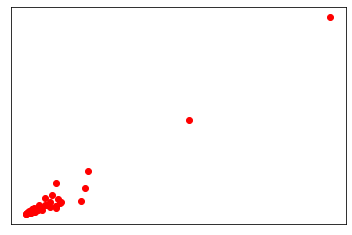

In [ ]:
X = df['NOX']
y = df['HC']

plt.scatter(X, y,  color='red')

plt.xticks(())
plt.yticks(())

plt.show()

Fitting Model & Results 

In [ ]:
import statsmodels.api as sm

X_const = sm.add_constant(X)
model = sm.OLS(y,X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     HC   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1751.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):           4.99e-45
Time:                        21:08:38   Log-Likelihood:                -252.72
No. Observations:                  60   AIC:                             509.4
Df Residuals:                      58   BIC:                             513.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3866      2.391     -2.671      0.0

Plot of Fitted Model

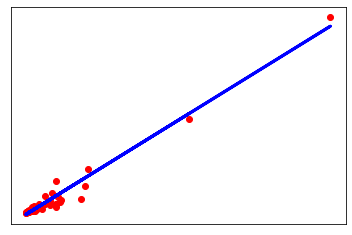

In [ ]:
plt.scatter(X, y,  color='red')
plt.plot(X, results.fittedvalues, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


Utilizing another package

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Test & Train Splitting

In [ ]:
# Split the data into training/testing sets
X_train = X_const[:-30]
X_test = X_const[-30:]

# Split the targets into training/testing sets
y_train = y[:-30]
y_test = y[-30:]

Fitting Model

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)


Model Performance Calculations

In [ ]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [0.         2.00318992]
Mean squared error: 343.75
Coefficient of determination: 0.90


Plotting Results

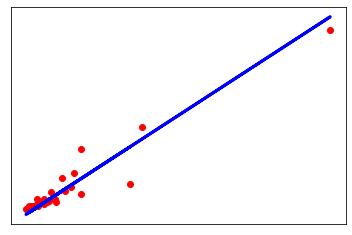

In [ ]:
# Plot outputs
plt.scatter(X_test['NOX'], y_test,  color='red')
plt.plot(X_test['NOX'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()